# Extracting Images from Seville Dataset

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
import imageProc as pr

sns.set_context('talk')
%matplotlib inline

In [2]:
plotFolder = "plots/sevilleData/"

In [3]:
zAnt = 0.01 #height of ant in m

In [4]:
dWorld = pr.extractWorld("data/world5000_gray.mat")

In [5]:
dRoutes, nframes = pr.extractRoutes("data/world5000_gray.mat",zAnt)

## Plot Top View of the Route

In [6]:
rt = 'Ant1_Route1'

In [7]:
frame = 250

Specify field of view, angular resolution and visibility

In [8]:
visibility = 2 #in m
hfovDeg = 296 #deg
resDeg = 4 #deg
upDeg = 60 #deg
downDeg = -15 #deg

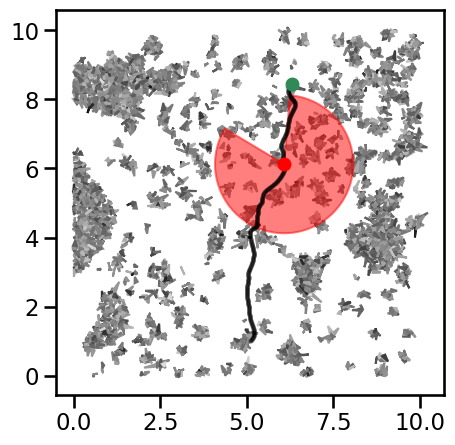

In [9]:
pr.top_view(rt, frame, visibility, dWorld, dRoutes, hfovDeg);
plt.savefig(plotFolder+"sample_route.png",dpi=300,bbox_inches = 'tight')

## Plot Scene from Ant PoV

Generate scene from the above parameters.

In [10]:
scene = pr.generateScene(rt, frame, visibility, dWorld, dRoutes, hfovDeg, resDeg, upDeg, downDeg, zAnt)

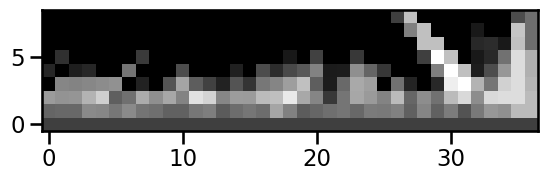

In [11]:
plt.imshow(scene,cmap='gray',origin='lower');
plt.savefig(plotFolder+"sample_scene.png",dpi=300,bbox_inches = 'tight')

## Generate Walkthrough

In [12]:
snapshots = 100

In [13]:
scenes = pr.walkThrough(nframes, rt, snapshots,
               visibility, dWorld, dRoutes, hfovDeg, resDeg, upDeg, downDeg, zAnt,
               animate=True, save=True, plotFolder=plotFolder)

.........

.........

## Plot PCA for Scenes along the Route

In [17]:
I = scenes.reshape(-1,scenes.shape[-1])

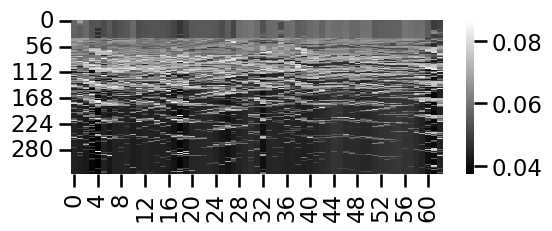

In [20]:
plt.figure(figsize = (6,2))
sns.heatmap(I[:,~np.isnan(I[0,:])],cmap='gray');

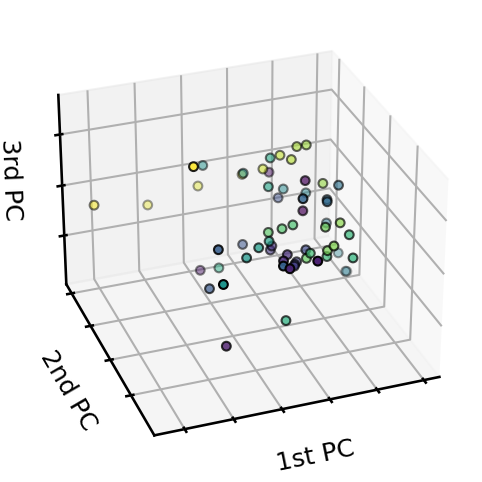

In [21]:
pr.plot_PCA_sceneVecs(I,y=np.arange(0,snapshots));